# Part I - Prosper Data Exploration
## by (Salvage Ajibade)

## Introduction
> This document explores a dataset containing borrower information and attributes for approximately 113,937 loans


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# pd.set_option('display.max_columns', None)  to view all columns

C:\Users\SAVVY\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
df=pd.read_csv('prosperLoanData.csv')
# reading our cv file into a dataframe

In [4]:
print(df.shape)
# to view the dimensions of the dataframe

(113937, 81)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

> This section contains a series of issues in the dataset  with their solutions in the define, code and test format

### 1. Dropping unecessary columns
_Here i will be dropping the columns i don't  intend to focus on and visualize_

In [6]:
my_columns=['ListingKey', 'ListingNumber', 'CreditGrade', 'BorrowerRate', 'BorrowerState', 
                    'Occupation', 'EmploymentStatus',  'EmploymentStatusDuration', 'IsBorrowerHomeowner','CreditScoreRangeLower',  'CreditScoreRangeUpper',
                    'DebtToIncomeRatio',  'IncomeRange',  'LoanStatus','ListingCategory (numeric)' ] # a list of wanted columns

trash=[]

for i in df.columns:
    if i not in my_columns:
        trash.append(i)
df=df.drop(axis=1,columns=trash)


Term==categorical, , CreditGrade==cat,
LoanStatus==cat, ClosedDate==datetime, occupation== cat,
employment status==cat, borrower state, EmploymentStatusDuration,
IsBorrowerHomeowner=='cat', IncomeRange==bin, CreditScoreRangeLower &CreditScoreRangeUpper

### 2. Missing employment status duration
_mising values will be replaced with zero due to unemployment_

In [7]:
df.loc[df.EmploymentStatusDuration.isna(),'EmploymentStatusDuration']=0


In [8]:
df.dropna(axis=0, how= 'all', subset=['DebtToIncomeRatio'], inplace=True)
# get rid of all rows with missing DebtToIncomeRatio values

In [9]:
dict(df.isna().sum())
#  to test if the changes have been made

{'ListingKey': 0,
 'ListingNumber': 0,
 'CreditGrade': 77677,
 'LoanStatus': 0,
 'BorrowerRate': 0,
 'ListingCategory (numeric)': 0,
 'BorrowerState': 5443,
 'Occupation': 3559,
 'EmploymentStatus': 2226,
 'EmploymentStatusDuration': 0,
 'IsBorrowerHomeowner': 0,
 'CreditScoreRangeLower': 585,
 'CreditScoreRangeUpper': 585,
 'DebtToIncomeRatio': 0,
 'IncomeRange': 0}

### 3.Too many 'past due variables'
_i'll be replacing the <120 Past Due variables with just 'past due'_

In [10]:
df.LoanStatus.value_counts()
# checking the number of unique values in LoanStatus

Current                   52478
Completed                 35340
Chargedoff                10751
Defaulted                  4763
Past Due (1-15 days)        722
Past Due (31-60 days)       327
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       242
FinalPaymentInProgress      189
Past Due (>120 days)         14
Cancelled                     5
Name: LoanStatus, dtype: int64

In [11]:
def replacer(col, replacement,replaced_list):
    df.loc[df[col].isin(replaced_list),col]=replacement
    
# a function that replaces values in the selected column that satisfies the replacement list with a chosen value    

In [12]:
replaced_list= df.LoanStatus.value_counts().index[4:9]
replacer(col='LoanStatus', replacement='Past Due',replaced_list= replaced_list)

In [13]:
df.loc[df['LoanStatus']=='Past Due (>120 days)','LoanStatus']='Defaulted'   
    
#     a loan becomes defaulted when it is past due for more than 120 days

In [14]:
df.LoanStatus.value_counts()

Current                   52478
Completed                 35340
Chargedoff                10751
Defaulted                  4777
Past Due                   1843
FinalPaymentInProgress      189
Cancelled                     5
Name: LoanStatus, dtype: int64

### 4. Untidy data(Two variales in the income range column)
_i will split the two values into two different columns and replace the upper limit of >100,000 value with 500,000_

In [15]:
# df['IncomeRangeLower'] and df['IncomeRangeUpper'] are new columns containing the lower and upper limits of the range column
df['IncomeRangeLower']=df.IncomeRange.str.split(r'[$+-]',expand=True)[1].str.replace(',','').astype(float) # str.replace bcos python cant turn commas to float
df['IncomeRangeUpper']=df.IncomeRange.str.split(r'[$-]',expand=True)[2].str.replace(',','').astype(float)


df.loc[df['IncomeRangeLower']==100000 ,'IncomeRangeUpper']=float (500000)

In [16]:
# replacing the remaining missing values with 0
df.loc[df['IncomeRangeLower'].isna() ,'IncomeRangeLower']= float(0)
df.loc[df['IncomeRangeUpper'].isna() ,'IncomeRangeUpper']= float(0)




In [17]:
df.IncomeRangeUpper.value_counts()
# to check unique values in the incomerangeupper value

49999.0     29881
74999.0     29360
500000.0    16071
99999.0     16015
0.0          7695
24999.0      6361
Name: IncomeRangeUpper, dtype: int64

### 5. Too many `occupation` variables to visualize

_ill be creating a new column named 'occupation classes' which describes the sector each occupation belongs to_

In [18]:
lists={
    'Executive_workers':['Professional','Executive'],
    'entrepreneur':['Computer Programmer','Car Dealer','Homemaker','Investor'],
    'students': ['Student - College Junior', 'Student - College Freshman','Student - College Sophomore', 'Student - Community College',
    'Student - Technical School','Student - College Graduate Student'],
    'health_workers':['Nurse (RN)','Medical Technician', 'Nurse (LPN)','Pharmacist','Doctor', "Nurse's Aide",
                    'Psychologist','Dentist',  'Chemist' ,'Biologist',  'Scientist'],

    'sales':[ 'Accountant/CPA','Sales - Commission', 'Sales - Retail','Analyst','Administrative Assistant'],
    'civil_servants':['Social Worker', 'Civil Service','Postal Service','Fireman' ],

    'food':['Food Service Management','Food Service','Waiter/Waitress'],
    'education':['Teacher', 'Professor', "Teacher's Aide", 'Administrative Assistant',
           'Retail Management','Principal'],

    'realestate_workers':['Landscaping','Administrative Assistant', 'Skilled Labor', 'Construction','Laborer', 'Realtor'],
   'engineers':['Engineer - Chemical', 'Engineer - Electrical', 'Engineer - Mechanical'],
    'transportation':['Truck Driver','Bus Driver','Pilot - Private/Commercial','Flight Attendant'],
    'religious_workers':['Clerical','Religious'],
    'law': ['Judge', 'Attorney', 'Police Officer/Correction Officer', 'Military Enlisted', 'Military Officer' ],
    'tradesman':['Tradesman - Carpenter','Tradesman - Plumber',  'Tradesman - Electrician','Tradesman - Plumber',
                 'Tradesman - Mechanic'],'Others':['Other']
        }


In [19]:
for key in lists:
    df.loc[df['Occupation'].isin(lists[key]),'Occupation_class']=key
#     to create a new column 'Occupation_class' which contains represents each occupation with  the sector each occupation belongs to

In [20]:
df.Occupation_class

0                     Others
1          Executive_workers
2                     Others
3         realestate_workers
4          Executive_workers
                 ...        
113932                  food
113933     Executive_workers
113934                Others
113935                  food
113936             education
Name: Occupation_class, Length: 105383, dtype: object

### 6. Too many States in Borrower state
<link>   _i'll be focusing on the top 6 states in the dataset and replacing the rest with others _ </link>

In [21]:
replaced_list=df.BorrowerState.value_counts().index[6:]
replacer(col='BorrowerState', replacement='Others',replaced_list= replaced_list)

In [22]:
df.BorrowerState.value_counts()

Others    57706
CA        13523
TX         6339
NY         6136
FL         6054
IL         5529
GA         4653
Name: BorrowerState, dtype: int64

### 8. Not employed have the same income as unemployed
_Replacing not available with unemployed_

In [23]:
df.loc[df.EmploymentStatus=='Not available','EmploymentStatus']='Not employed'

### 7. Wrong data types
_replace wrong data types with the appropriate ones _

In [24]:
df.info()
# provides basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105383 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 105383 non-null  object 
 1   ListingNumber              105383 non-null  int64  
 2   CreditGrade                27706 non-null   object 
 3   LoanStatus                 105383 non-null  object 
 4   BorrowerRate               105383 non-null  float64
 5   ListingCategory (numeric)  105383 non-null  int64  
 6   BorrowerState              99940 non-null   object 
 7   Occupation                 101824 non-null  object 
 8   EmploymentStatus           103157 non-null  object 
 9   EmploymentStatusDuration   105383 non-null  float64
 10  IsBorrowerHomeowner        105383 non-null  bool   
 11  CreditScoreRangeLower      104798 non-null  float64
 12  CreditScoreRangeUpper      104798 non-null  float64
 13  DebtToIncomeRatio          10

In [25]:
df['ListingCategory (numeric)']=df['ListingCategory (numeric)'].astype('object')
df['Occupation_class']=df['Occupation_class'].astype('category')
df['BorrowerState']=df['BorrowerState'].astype('category')

In [26]:
# changing datatypes to categorical and puttin them in the right order     

ordinal_var_dict = {'CreditGrade':  [ 'NC','HR','E', 'D', 'C','B','A','AA'],
                    'LoanStatus':   ["Chargedoff",'Defaulted','PastDue',"Cancelled",'Current','FinalPaymentInProgress','Completed'],
                    'EmploymentStatus': ['Other','Not employed','Retired','Employed','Self-employed','Part-time', 'Full-time' ]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)
    


### Feature Engineering

In [27]:
df['Income']=(df['IncomeRangeLower']+df['IncomeRangeUpper'])/2 #creating Income column which is an average of the income range
df['CreditScore']=(df['CreditScoreRangeLower']+df['CreditScoreRangeUpper'])/2 #creating CreditScore column which is an average of the income range

In [28]:
df=df.drop(axis=1,columns=['IncomeRangeLower', 'IncomeRangeUpper', 
                           'CreditScoreRangeLower', 'CreditScoreRangeUpper','IncomeRange'])

# dropping irrelevant columns

In [29]:
len(df.columns)
#  to print the number of columns

15

### What is the structure of your dataset?

> There are 113,936 loans in the dataset with 81 features . Most variables are numeric in nature, but the variables 
IsBorrowerHomeowner, CurrentlyInGroup & IncomeVerifiable are booleans                 

CreditGrade,LoanStatus,employment status, are ordered factor variables with the following levels.

(worst) ——> (best) <br>
- CreditGrade: NC, HR,E,D, C,B,A,AA, <br>
- LoanStatus:  "Chargedoff",Defaulted,PastDue,Due,"Cancelled",,FinalPaymentInProgress,Current,Completed<br>
- EmploymentStatus: Other, Not available, Not employed,  Retired, Self-employed,Employed, Part-time, Full-time,


### What is/are the main feature(s) of interest in your dataset?
>I'm most interested in figuring out what features are best for predicting if a borrower will default.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the following features have huge impact on an indiviuals attitude towards loans:CreditGrade, LoanStatus,occupation,employment status, borrower state, EmploymentStatusDuration,IsBorrowerHomeowner, IncomeRange, CreditScoreRangeLower, CreditScoreRangeUpper, BorroweRate. The occupation &employment status affects how much they earn in order to pay back on time. Also, it will help me see which class takes loan the most. I would also like to know if home owners borrow loans often to pay off mortgage.

#  Questions:
   
- What is the distribution?count of each variable aross the dataset?
- Which occupation_class has the highest income
- which occupation_class has the poorest creditgrade/score
- Does Borrower rate  vary for each occcupation
- Does DebtToIncomeRatio  vary for each occcupation 
- Which state has the highest unemployment
- Common  occupations in each state
- W the highest DebtToIncomeRatio
- state with the highest AvailableBankcardCredit	


## Univariate Exploration

> I'll start by looking at the distribution of the ordinal variables of interest:Loan Statu, Employment Status and Credit grade


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.


> check black dominated cities

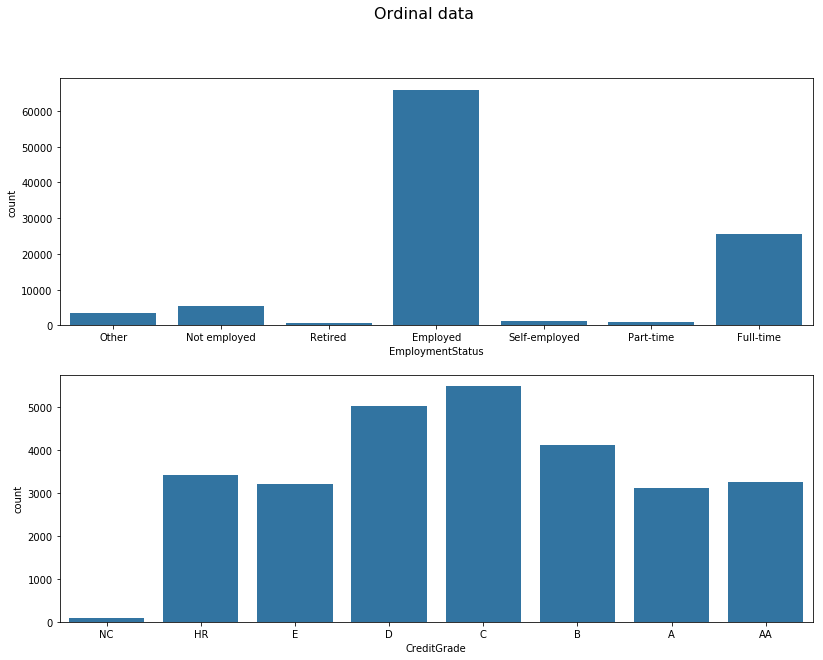

In [30]:
# creating countplot for different categorial variables

fig, ax = plt.subplots(nrows=2, figsize = [13.5,10])
default_color = sb.color_palette()[0]
# sb.countplot(data = df, x = 'LoanStatus', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'EmploymentStatus', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'CreditGrade', color = default_color, ax = ax[1])

plt.suptitle('Ordinal data', size=16);



 - ***Majority of the borrowers have a source of  income , fair credit grades  & are not loan deliquents. Next we will be checlking their income***

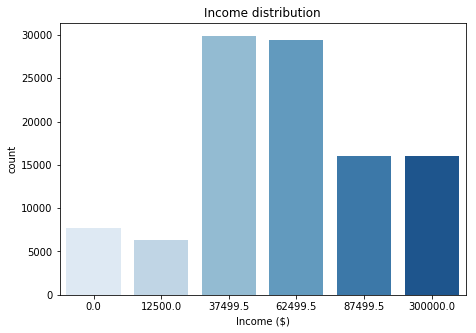

In [31]:
plt.figure(figsize=[16, 5])
plt.subplot(1,2,1)
sb.countplot(data = df, x= 'Income',palette = 'Blues');
plt.xlabel('Income ($)')
plt.title( 'Income distribution')  ;


***the distribution of monthly income across the borrowers is ideal but quite categoricalhave about 10,000 zero income which is about the same number of unemployed borrowers in the dataset . lets check the occuoations of the borrowers***

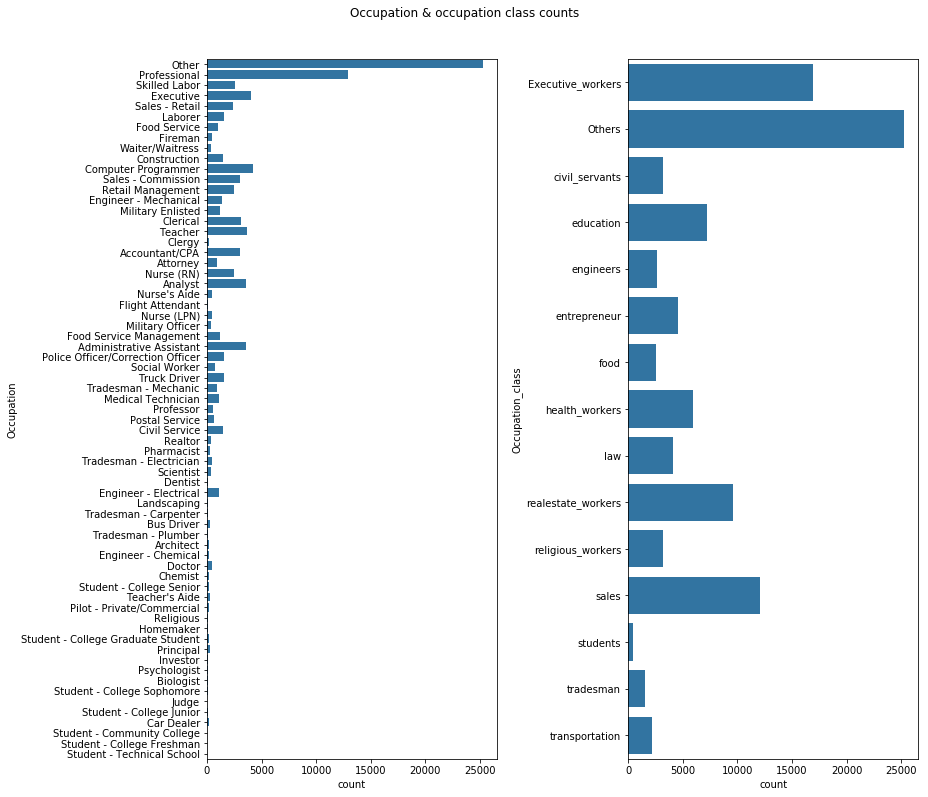

In [32]:

fig, ax = plt.subplots( ncols=2, figsize = [13,10.5])
default_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'Occupation', color = default_color, ax = ax[0])
sb.countplot(data = df, y = 'Occupation_class', color = default_color, ax = ax[1])
fig.tight_layout()
plt.suptitle( 'Occupation & occupation class counts',x=0.5, y=1.05);

 ***The most commnon occupations of the borrowers are: Professional,Executive, Computer programmer, Teacher, Analyst and Administrative assistant. This explains why dominant  occupation classes are : Executive workers, sales department and  realestate workers. In the bivariate analysis, we will be able to see clearly how income varies across each occupation. Let us see why they take these loans***

**Meaning of each listing category**

listing_dict={ '0' :'Not Available', '1': 'Debt Consolidation', '2' :'Home Improvement',
                 '3' : 'Business', '4' : 'Personal Loan', '5' :'Student Use', '6' :'Auto', '7': 'Other', '8': 'Baby&Adoption', '9' : 'Boat', '10': 'Cosmetic Procedure', 
                 '11': 'Engagement Ring', '12' : 'Green Loans', '13': 'Household Expenses', '14':'Large Purchases', '15':'Medical/Dental', '16':'Motorcycle', '17':' RV', '18' :'Taxes', '19':'Vacation', 
                 '20':'Wedding Loans'}

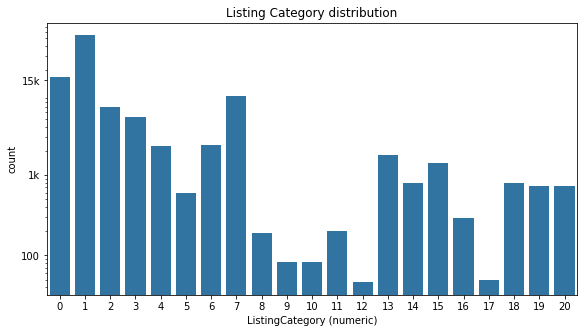

In [33]:
# a countplot for the Listing Category

c=sb.color_palette()[0]
# general color for categorical data

plt.figure(figsize=[9.5, 5])
sb.countplot(data = df, x= 'ListingCategory (numeric)', color=c)
plt.xlabel('ListingCategory (numeric)')
plt.yscale('log') 
# log transformation of the yscale to make visible the smaller quantities
plt.yticks([100, 1000, 15000], [100, '1k', '15k'])
plt.title( 'Listing Category distribution');

***The most common reasons for taking loans are***
- '1': 'Debt Consolidation'
- '2' :'Home Improvement'
- '3' : 'Business'
- '4' : 'Personal Loan'
- '13': 'Household Expenses'

These will probably have a relationship with other details about the borrowers such as occupation, state or even properties.
Let use explore other variables.

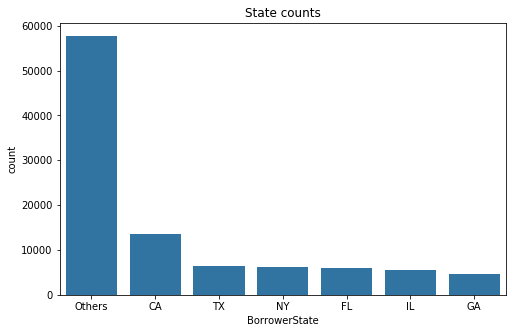

In [34]:
# countplot of BorrowerState
order=df.BorrowerState.value_counts().index
plt.figure(figsize=[8, 5])
sb.countplot(data = df, x= 'BorrowerState', color=c, order=order)
plt.xlabel('BorrowerState')
plt.title( 'State counts');

***California, Texas and NewYork are the most common states with loan histories***

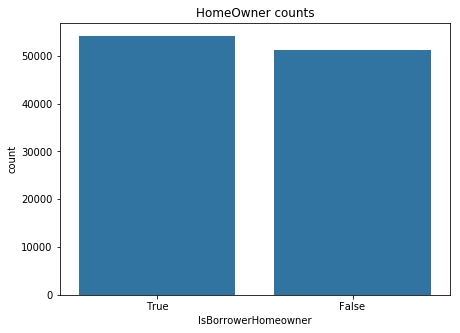

In [35]:
order=df.IsBorrowerHomeowner.value_counts().index
plt.figure(figsize=[7, 5])
sb.countplot(data = df, x= 'IsBorrowerHomeowner', color=c, order=order)
plt.title( 'HomeOwner counts');

***51% of the borrrowers have houses, we will see in the other section if it has to do with occupation or source of income***

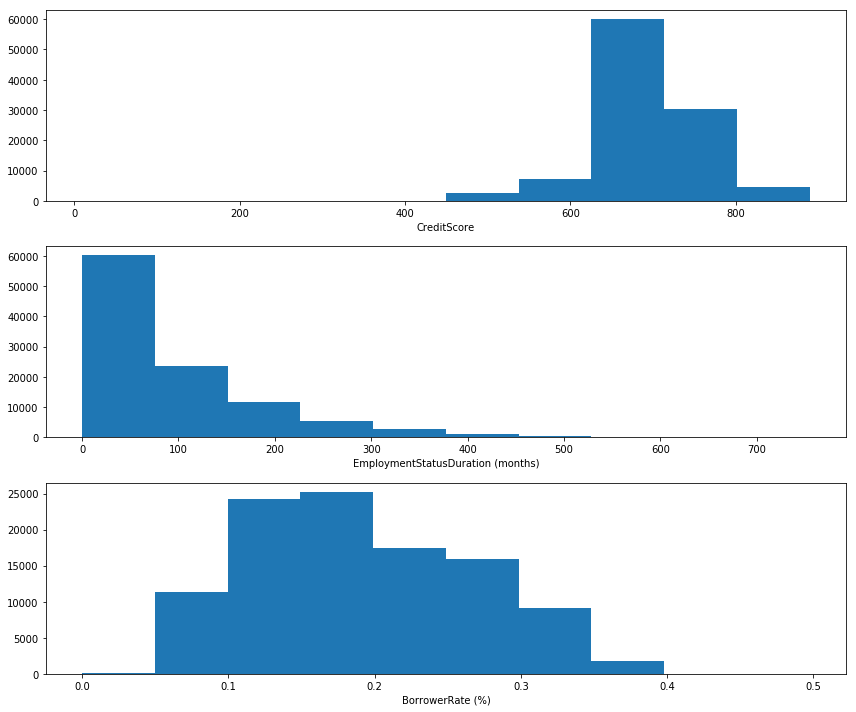

In [36]:
plt.figure(figsize=[12, 10])

plt.subplot(3,1,1)
plt.hist(data = df, x = 'CreditScore', color=c)
plt.xlabel('CreditScore');

plt.subplot(3,1,2)
# plt.figure(figsize = [12,7])
plt.hist(data = df, x = 'EmploymentStatusDuration',color=c)
plt.xlabel('EmploymentStatusDuration (months)');


plt.subplot(3,1,3)
plt.hist(data = df, x = 'BorrowerRate', color=c)
plt.xlabel('BorrowerRate (%)')
plt.tight_layout();

 - ***Good credit scores start from 650.The scores in our plot makes it obvious that most borrowers in the dataset have good credit scores and  the most frequent employment status duration between 0 and 150 months.  The credit scores are skewed to the  left while the borrower rate are skewed to the left. The Borrower rates are ideal, they attest to to the good credit scores we have seen earlier.*** 
 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Due to the large number of rows in the dataset, it was needed to apply log transform in our countplots to be able to see some categories with very few counts. Under the transformation, the listing categories variables looked a bit more visible and the credit grades had more realistic differences.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusual distributions were observed

## Bivariate Exploration

### Correlation between numeric columns
We can start by checking the correlation in the dataset

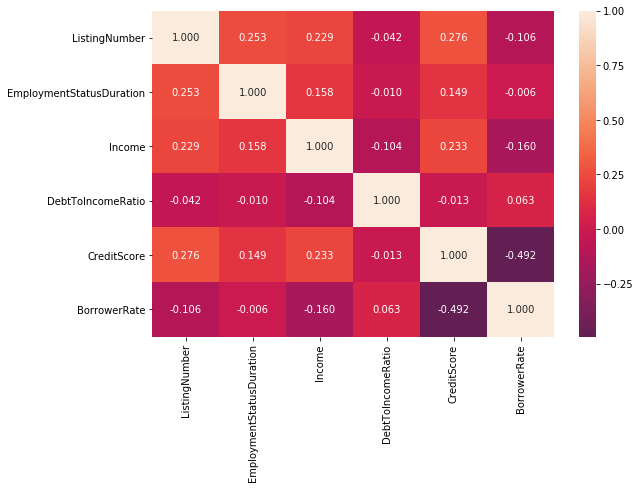

In [37]:
# a heatmap to check the correlation between numeric variables of the dataset

numeric_df= df[['ListingKey', 'ListingNumber', 
        'EmploymentStatusDuration','Income','DebtToIncomeRatio','CreditScore', 'BorrowerRate']]

plt.figure(figsize = [9, 6])
sb.heatmap(numeric_df.corr(), annot = True, fmt = '.3f',
           cmap = 'rocket', center = 0)
plt.show()

***While the rest of the variables barely have any form of correlation, credit scores and borrower rate are negatively correlated. As observed,it implies that the increase in credit score causes a decrease in borrower rate. Let us take a closer look in the next visualization***


### Credit score vs borrower rate

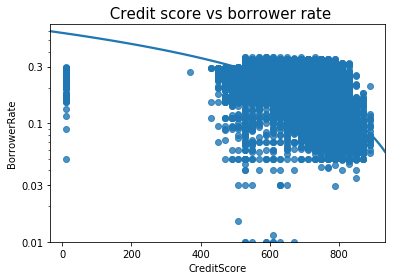

In [38]:
# a barplot showing relationship btwn credit grade  and BorrowerRate


# plt.figure(figsize = [10, 8])
sb.regplot(x='CreditScore', y='BorrowerRate', data=df, color=c,scatter=True);
plt.yscale('log')
plt.yticks([0.01, 0.03, 0.1, 0.3], [0.01, 0.03, 0.1, 0.3])
plt.title(' Credit score vs borrower rate',size=15); #to add title to the plot

***This confirms the observation we documented earlier, the two variables are inversely correlated. let us check its relationship with other variables ***

### Occupation Class vs Income and Credit score

In [39]:
order=['Executive_workers','engineers', 'entrepreneur', 'law', 'health_workers','sales' ,'civil_servants', 'tradesman', 'education', 'Others',
       'transportation', 'realestate_workers', 'food', 'religious_workers', 'students']

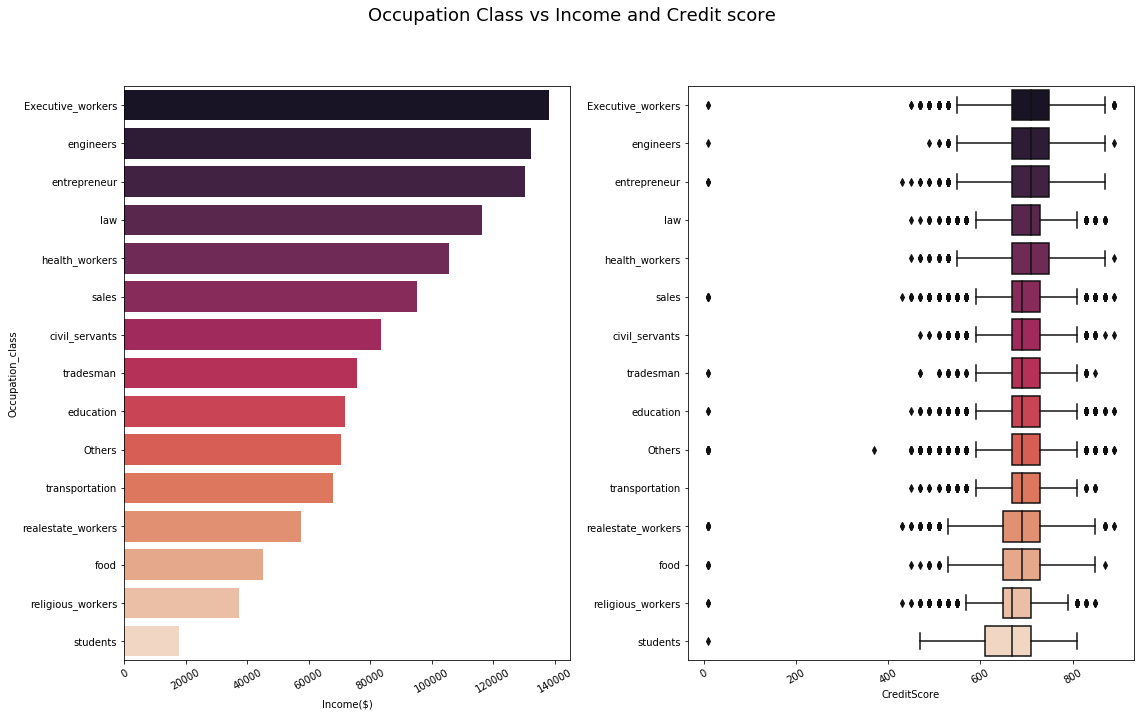

In [40]:
# to plot a countplot-showing the highest paid sectors and the boxplot-showing the distribution across each sector

plt.figure(figsize = [16, 9])

plt.subplot(1,2,1)
accord=df.groupby('Occupation_class').mean().reset_index()
accord=accord.sort_values(by=['Income','Occupation_class'], ascending=False)
sb.barplot(y='Occupation_class',x='Income', data=accord, palette='rocket',order=order )
plt.xlabel('Income($)')
plt.xticks(rotation=30);

plt.subplot(1,2,2)
# plt.figure(figsize = [12,7])
sb.boxplot(y='Occupation_class', x='CreditScore', data=df, palette='rocket',order=order)
plt.ylabel('')

plt.xticks(rotation=30)

plt.tight_layout()
plt.suptitle('Occupation Class vs Income and Credit score',size=18, x=0.5, y=1.1);

***The executive workers, engineers, entrepreneurs have the highest incomes as well as the best credit scores. The students have the least income, i guess this explains why majority of them have relatively low credit scores***

###  ListingCategory (numeric) vs DebtToIncomeRatio, 'CreditScore, EmploymentStatusDuration

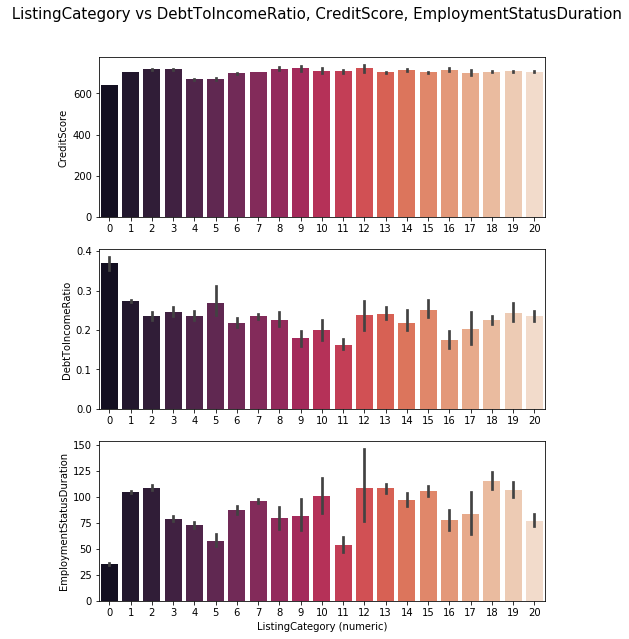

In [41]:
# a barplot showing relationship btwn ListingCategory   and three numeric  variables


plt.figure(figsize = [8, 10])

plt.subplot(3,1,1)
sb.barplot(y='CreditScore', x='ListingCategory (numeric)', data=df,palette='rocket' )
plt.xlabel('')  #to avoid repetition of labels

plt.subplot(3,1,2)
sb.barplot(y='DebtToIncomeRatio', x='ListingCategory (numeric)', data=df, palette='rocket')
plt.xlabel('')

plt.subplot(3,1,3)
sb.barplot(y='EmploymentStatusDuration', x='ListingCategory (numeric)', data=df, palette='rocket')

plt.suptitle(' ListingCategory vs DebtToIncomeRatio, CreditScore, EmploymentStatusDuration', size=15, x=0.5, y=0.95);

***Credit score is not  really affected by Reasons, that is, ListingCategory (numeric).'1': 'Debt Consolidation', '5' :'Student Use', '15':'Medical/Dental' are associated with higher Debt to income ratios. Borrowers with high employment status duration tend to take loan for the following reasons: 
                 '2' :'Home Improvement', '12' : 'Green Loans', '13': 'Household Expenses','18' :'Taxes'. Does employent status duration affect income?***

### Credit grade vs income, borrower rate and employment status duration

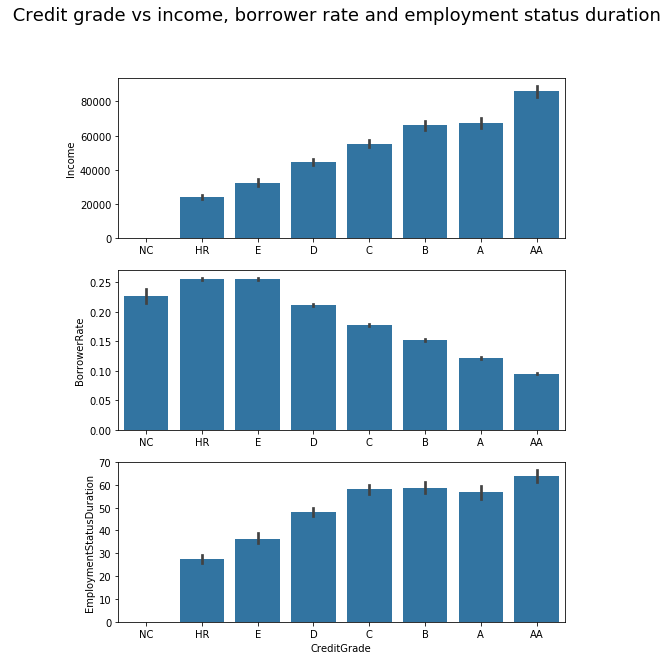

In [42]:
# a barplot showing relationship btwn credit grade  and three nummeric  variables


plt.figure(figsize = [8, 10])

plt.subplot(3,1,1)
sb.barplot(x='CreditGrade', y='Income', data=df, color=c);
plt.xlabel('')

plt.subplot(3,1,2)
sb.barplot(x='CreditGrade', y='BorrowerRate', data=df, color=c);
plt.xlabel('')

plt.subplot(3,1,3)
sb.barplot(x='CreditGrade', y='EmploymentStatusDuration', data=df, color=c);

plt.suptitle(' Credit grade vs income, borrower rate and employment status duration',size=18); #to add title to the plot

***Borrowers who have higher incomes and longer employment status duration have the best credit grades and the least borrower rates. This imitates the relationship between income and credit scores. Also, the relationship btwn employment status duration and credit grades is very similar with credit grades and income. This explains that longer you are employed the higher the income and the easier it is to keep up with debts. Let us check some other relationships with income***

### EmploymentStatus vs Income

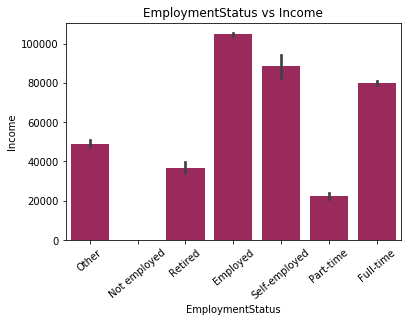

In [43]:
# a barplot showing income based on employment status

c=sb.color_palette('rocket')[2]
sb.barplot(x='EmploymentStatus', y='Income', data=df, color=c)
plt.xticks(rotation=40)
plt.title('EmploymentStatus vs Income');

***It is pretty intuitive why the employed earn more than the unemployed, however it is suprising that the retired earn more than the part-time workers. lets study employment staus a little bit more***

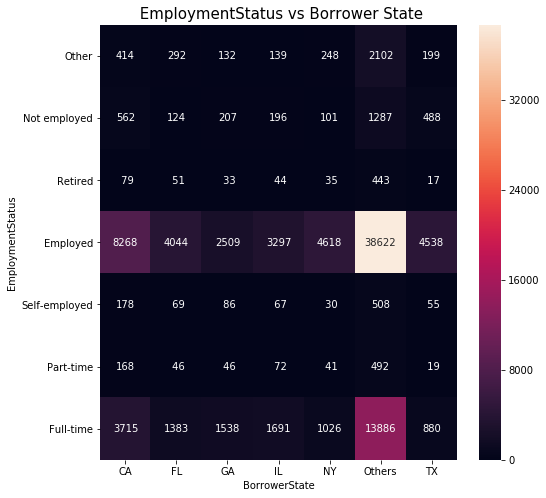

In [44]:
# plotting a heatmap to see the most common employment status in each state

new_df=df.groupby(['BorrowerState','EmploymentStatus']).size().reset_index(name = 'count')
new_df = new_df.pivot(index = 'EmploymentStatus', columns = 'BorrowerState',
                            values = 'count')


plt.figure(figsize=[8, 8])
sb.heatmap(data=new_df, cmap='rocket',annot=True,fmt='3g');
plt.title(' EmploymentStatus vs Borrower State', size=15, x=0.5, y=0.9);

***Texas has the least number of retired people, that says a lot about age range in Texas.The high puplation in California explains why it tends to have very high numbers in all categoriies.  next, well see more of states***

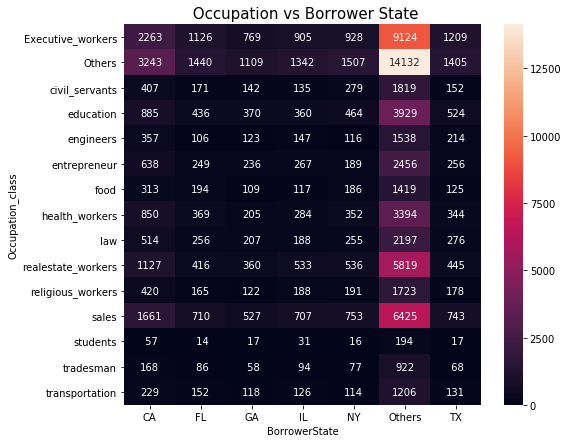

In [45]:
# plotting a heatmap to see the most common occupations in each state
new_df=df.groupby(['Occupation_class','BorrowerState']).size().reset_index(name = 'count')
new_df=new_df.pivot(index = 'Occupation_class', columns = 'BorrowerState',
                            values = 'count')

plt.figure(figsize=[8, 7])
sb.heatmap(data=new_df, cmap='rocket',annot=True,fmt='3g')
plt.title(' Occupation vs Borrower State', size=15, x=0.5, y=0.9);

***There seems to be alot of civil servants in  New York,***
***Illnois has the fewest number of workers in the educational sector but a relatively  high number of students.Let us see if occupation aftects the listing category***

### Meaning of each listing category

legend_dict={ '0' :'Not Available', '1': 'Debt Consolidation', '2' :'Home Improvement',
                 '3' : 'Business', '4' : 'Personal Loan', '5' :'Student Use', '6' :'Auto', '7': 'Other', '8': 'Baby&Adoption', '9' : 'Boat', '10': 'Cosmetic Procedure', 
                 '11': 'Engagement Ring', '12' : 'Green Loans', '13': 'Household Expenses', '14':'Large Purchases', '15':'Medical/Dental', '16':'Motorcycle', '17':' RV', '18' :'Taxes', '19':'Vacation', 
                 '20':'Wedding Loans'}

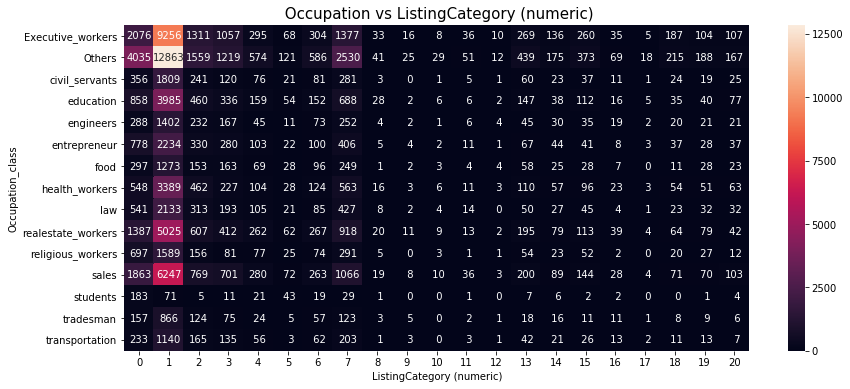

In [46]:
# plotting a heatmap to see the most common occupations in each state
new_df=df.groupby(['Occupation_class','ListingCategory (numeric)']).size().reset_index(name = 'count')
new_df=new_df.pivot(index = 'Occupation_class', columns = 'ListingCategory (numeric)',
                            values = 'count')

plt.figure(figsize=[14, 6])
sb.heatmap(data=new_df, cmap='rocket',annot=True,fmt='3g')
plt.title(' Occupation vs ListingCategory (numeric)', size=15, x=0.5, y=0.9);

*** sales workers took more student loans than students.Executives took the highest number of loans for auto. Most of these borrowers took loans for debt consolidation. Students took more loans for other reasons than student loans. Does listing category affect states too?. ***

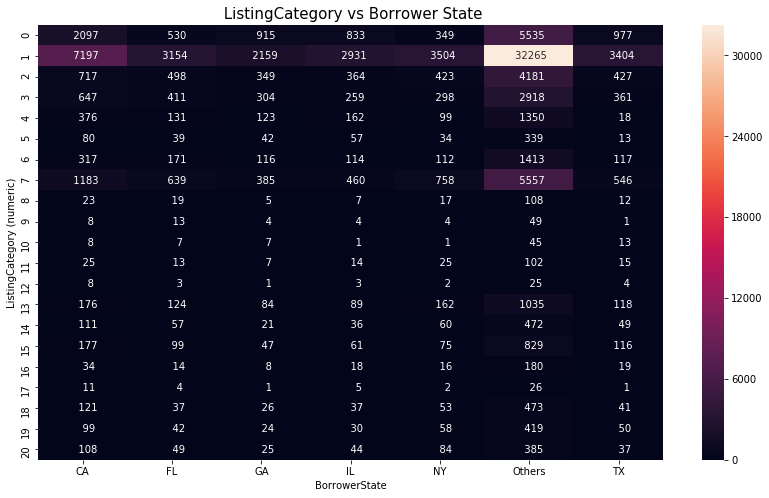

In [47]:
# plotting a heatmap to see the most common reason for borrowing a loan in each state

new_df=df.groupby(['BorrowerState','ListingCategory (numeric)']).size().reset_index(name = 'count')
new_df=new_df.pivot(columns = 'BorrowerState', index = 'ListingCategory (numeric)',
                            values = 'count')

plt.figure(figsize=[14, 8])
sb.heatmap(data=new_df, cmap='rocket',annot=True,fmt='6g');
plt.title(' ListingCategory vs Borrower State', size=15, x=0.5, y=0.9);

***There was a very high number of loans for cosmetic procedure in texas, and boats in Florida (due to the fact that florida has alot of water bodies). Numerous loans  were tken in Florida for engagement rings,in NewYork for wedings, Let us move to debt to income variable***

###  Debttoincome  vs state , creditgrade, loan status

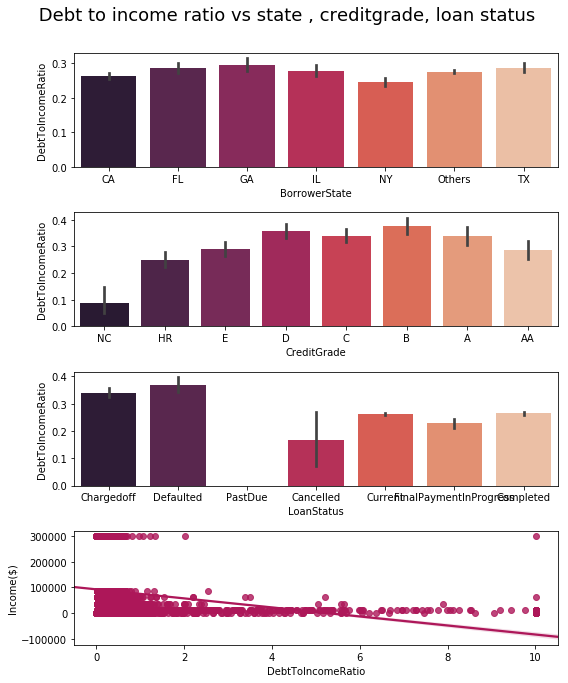

In [48]:
# a barplot showing relationship btwn Debttoincome ratio  and three categorical  variables

plt.figure(figsize = [8, 9])

plt.subplot(4,1,1)
sb.barplot(y='DebtToIncomeRatio', x='BorrowerState', data=df, palette='rocket')

plt.subplot(4,1,2)
sb.barplot(y='DebtToIncomeRatio', x='CreditGrade', data=df, palette='rocket')

plt.subplot(4,1,3)
sb.barplot(y='DebtToIncomeRatio', x='LoanStatus', data=df, palette='rocket')

plt.subplot(4,1,4)
sb.regplot(x='DebtToIncomeRatio',y='Income', data=df,color=c)
plt.ylabel('Income($)')           

plt.suptitle(' Debt to income ratio vs state , creditgrade, loan status', size=18, x=0.5, y=1.05)
plt.tight_layout();

***Defaulted/Charged off loans tend to be caused by  high Debt to income ratios.  However, Debt to income ratio doesnt affect Credit grades . Also, Most borrowers with more than 10,000 income have a very low debttoincome ratio. The state withe least debt to income ratio is NewYork. Later on, we will see if the high debt to income ratio in GA (Georgia) leads to high default rate*** 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  I  noticed that high debttoincome ratios were linked to defaulted and charged off loans.  These Debt to income ratios didnt really correlate with the income in the heatmap but after creating a scatter plot. i realised that most borrowers with more than 5,000 income had a very low debttoincome ratio. This might mean that the unemployed will be linked to most of the loan defaults. Since, Georgia has the highest default rate, and  Georgia has the 3rd highest number of unemployed borrowers but least number of part time workers(these are the two clasees that earn the least).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that occupation_classes didnt really affect occupations as much as location of borrowers did. For example: sales workers took more student loans than students.Executives took the highest number of loans for auto . . Students took more loans for other reasons than student loans.On the other hand, here was a very high number of loans for cosmetic procedure in texas, and boats in Florida (due to the fact that florida has alot of water bodies). 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Let us see how many home owners are in various occupations and for what reason they took the loan

#### Meaning of each listing category

legend_dict={ '0' :'Not Available', '1': 'Debt Consolidation', '2' :'Home Improvement',
                 '3' : 'Business', '4' : 'Personal Loan', '5' :'Student Use', '6' :'Auto', '7': 'Other', '8': 'Baby&Adoption', '9' : 'Boat', '10': 'Cosmetic Procedure', 
                 '11': 'Engagement Ring', '12' : 'Green Loans', '13': 'Household Expenses', '14':'Large Purchases', '15':'Medical/Dental', '16':'Motorcycle', '17':' RV', '18' :'Taxes', '19':'Vacation', 
                 '20':'Wedding Loans'}

### ListingCategory (numeric) vs Occupation_class vs Homeowners

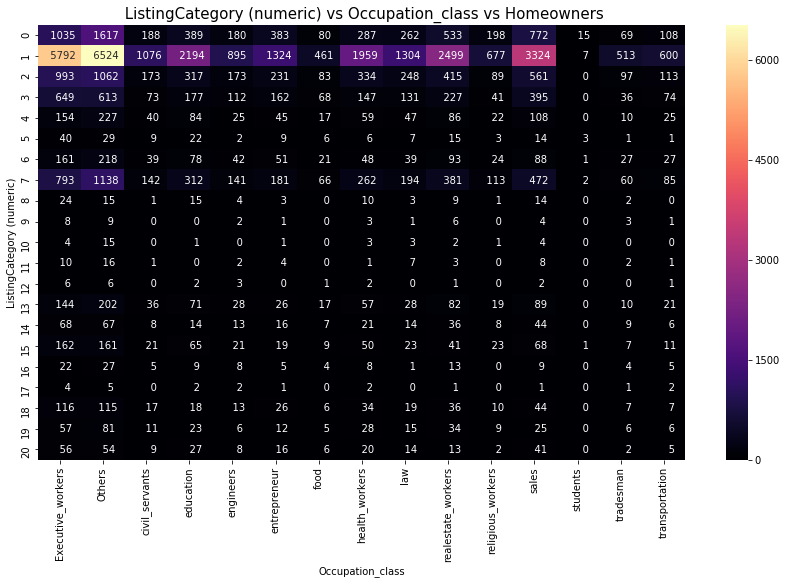

In [49]:
# plotting a heatmap to see the why most  home owners take a loan and to know which occupation class they fall into

df_homeowners=df[df.IsBorrowerHomeowner==True]
new_df=df_homeowners.groupby(['ListingCategory (numeric)','Occupation_class']).size().reset_index(name = 'count')
new_df=new_df.pivot(columns = 'Occupation_class', index = 'ListingCategory (numeric)',
                            values = 'count')

plt.figure(figsize=[14.5, 8])
sb.heatmap(data=new_df, cmap='magma',annot=True,fmt='6g')
plt.title(' ListingCategory (numeric) vs Occupation_class vs Homeowners', size=15, x=0.5, y=0.9);

***Here, we can see that most students dont own homes. Also, most home owners spend money on these (in descending order):'1': 'Debt Consolidation', '2' :'Home Improvement', '3' : 'Business', '4' : 'Personal Loan', '6' :'Auto',  '13': 'Household Expenses', '15':'Medical/Dental' and '18' :'Taxes'***


###  BorrowerState vs BorrowerRate

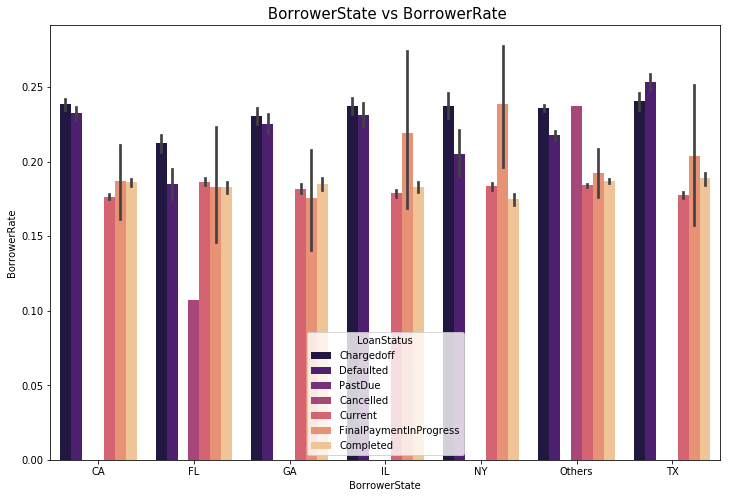

In [50]:
# a barplot to see the borrower rate attached to each loan status annd in each state

plt.figure(figsize=[12, 8])

sb.barplot(x='BorrowerState', y='BorrowerRate', hue='LoanStatus', data=df,palette='magma')
plt.title(' BorrowerState vs BorrowerRate', size=15, x=0.5, y=1.0);

***Contrary to what was observed about Georgia in the multivariate exploration, Texas happens to have the highest number of defaults here with high borrower rates. We can see that high borrower rates too can cause borrowers to default***

In [51]:
new_df=df.groupby(['BorrowerState', 'ListingCategory (numeric)','LoanStatus']).count().reset_index()
new_df=new_df.loc[new_df.LoanStatus.isin(['Chargedoff','Defaulted'])].reset_index(drop=True)

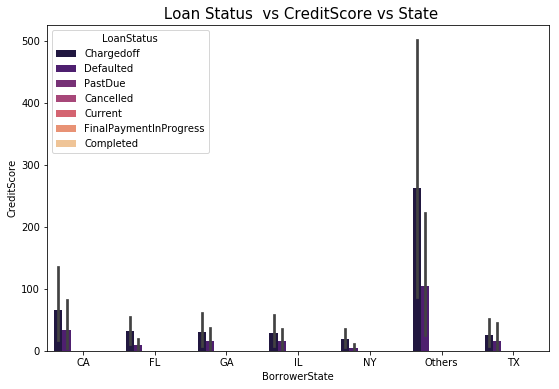

In [52]:
plt.figure(figsize=[9, 6])
sb.barplot(x='BorrowerState', y='CreditScore', hue='LoanStatus', data=new_df,palette='magma')
plt.title(' Loan Status  vs CreditScore vs State', size=15, x=0.5, y=1.0);

***Borrowers from Georgia are the least in the dataset.This plot clearly proves that Georgia has the highest number of defaults and charge offs in ratio its population. These borrowers have a credit score below 100***

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms fof looking at your feature(s) of interest?

> I extended my investigation on the relationship between various loan statuses to Credit scores and borrower rates. Based on the visualizations, we can see that the Credit scores of the defaulters are mostly below 100 while the borrower rates are headed towards 0.25. It also confirms that Georgia has the highest loan default rate.  

### Were there any interesting or surprising interactions between features?

> It was observed that very few students have homes. I also noticed that the second most frequent reason home owners take  loans is '2' :'Home Improvement'.

## Conclusions


1. Conclusions: After i did a couple of wrangling and exploration, i discovered that the some reasons that lead to loan default/charge offs (delinquency) are High borrower rates, very low credit scores, and low income (or unemployment). I also observed that most of the borrowers in Georgia default.




2. Limitations:
 - I only observed 15 of 81 variables, which prevents my analysis from being completely accurate
 - Majority of the borrower state was from California which i consider inbalance
 - the income ranges were not really realistic, they were  discrete and few. 
  - there were to many categories in states and occupation columns, so, i could not fully analyse them